In [1]:
import sys; sys.path.insert(0, '../../')

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from models.snn.factory import build_snn
from models.snn.train import train_model, evaluate_model
from models.snn.tuning import tune_hyperparameters
from models.preprocessing import load_preprocessed

2025-12-30 13:10:28.739838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-12-30 13:10:28.739896: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-12-30 13:10:31.780547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-12-30 13:10:31.780547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-12-30 13:10:35.097469: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libc

In [3]:
splits, class_names = load_preprocessed('../../data/processed/')
X_train, y_train = splits['train']
X_val, y_val = splits['val']
X_test, y_test = splits['test']

Loaded train: X=(9, 6144), y=(9, 10)
Loaded val: X=(3, 6144), y=(3, 10)
Loaded test: X=(2, 6144), y=(2, 10)
Loaded class names: ['benjamin', 'christian', 'felix', 'jonas', 'leon', 'mark', 'marvin', 'ohman', 'veronica', 'yannes']


In [4]:
checkpoint_dir = Path('../../checkpoints/snn')
env_path = checkpoint_dir / "best_hparams.env"

In [5]:
# Load hyperparameters from env file if it exists, otherwise use defaults
if env_path.exists():
    print(f"Loading hyperparameters from {env_path}")
    hparams = {}
    with env_path.open("r") as f:
        for line in f:
            line = line.strip()
            if line and '=' in line:
                key, value = line.split('=', 1)
                hparams[key] = value
    
    best_hidden = int(hparams.get('N_NEURONS_HIDDEN'))
    best_syn_fast = float(hparams.get('SYNAPSE_FAST'))
    best_syn_slow = float(hparams.get('SYNAPSE_SLOW'))
    best_lr = float(hparams.get('LEARNING_RATE'))
    best_batch_sz = int(hparams.get('BATCH_SIZE'))
    
    print("Loaded hyperparameters:")
else:
    print(f"Env file not found at {env_path}, using default hyperparameters")
    best_hidden = 200
    best_syn_fast = 0.005
    best_syn_slow = 0.03
    best_lr = 0.001
    best_batch_sz = 32
    
    print("Using default hyperparameters:")

print(f"  Hidden neurons: {best_hidden}")
print(f"  Synapse fast: {best_syn_fast}")
print(f"  Synapse slow: {best_syn_slow}")
print(f"  Learning rate: {best_lr:.2e}")
print(f"  Batch size: {best_batch_sz}")

Loading hyperparameters from ../../checkpoints/snn/best_hparams.env
Loaded hyperparameters:
  Hidden neurons: 167
  Synapse fast: 0.0044048588944318855
  Synapse slow: 0.05422395713610029
  Learning rate: 1.10e-03
  Batch size: 32


In [6]:
# Build the SNN architecture with hyperparameters
print("Building SNN architecture with hyperparameters...")
net, inp, p_out = build_snn(
    n_features=X_train.shape[1],
    n_classes=len(class_names),
    n_neurons_hidden=best_hidden,
    synapse_fast=best_syn_fast,
    synapse_slow=best_syn_slow,
)
print(f"Network built with {X_train.shape[1]} input features and {len(class_names)} output classes")
print(f"Hidden layer: {best_hidden} neurons")
print(f"Synapse fast: {best_syn_fast}, Synapse slow: {best_syn_slow}")

Building SNN architecture with hyperparameters...
Network built with 6144 input features and 10 output classes
Hidden layer: 167 neurons
Synapse fast: 0.0044048588944318855, Synapse slow: 0.05422395713610029


In [7]:
# Train the SNN with best hyperparameters from tuning
print("Starting full training with best hyperparameters...")
print(f"Learning rate: {best_lr:.2e}, Batch size: {best_batch_sz}\n")

history, sim = train_model(
    net=net,
    inp=inp,
    p_out=p_out,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=20,
    batch_size=best_batch_sz,
    learning_rate=best_lr,
    checkpoint_dir=checkpoint_dir,
    use_early_stopping=True,
    early_stopping_min_delta=0.01,
    early_stopping_patience=5,
)

Starting full training with best hyperparameters...
Learning rate: 1.10e-03, Batch size: 32

Creating simulator...
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--


/home/z003dy4u/.local/share/virtualenvs/neuroAi--2d0xc2p/lib/python3.10/site-packages/nengo_dl/simulator.py:456: UserWarning: No GPU support detected. See https://www.nengo.ai/nengo-dl/installation.html#installing-tensorflow for instructions on setting up TensorFlow with GPU support.
  warnings.warn(


|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|                     Building network (0%)                    | ETA:  --:--:--
|######               Building network (10%)                     | ETA: 0:00:05
|######               Building network (10%)                     | ETA: 0:00:05
|######               Building network (10%)                     | ETA: 0:00:05
|######               Building network (10%)                     | ETA: 0:00:05
|######               Building network (10%)                     | ETA: 0:00:06
|######               Building network (10%)                     | ETA: 0:00:06
|######               Building network (10%)                     | ETA: 0:00:06
|######               Building network (

2025-12-30 13:10:38.445384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-12-30 13:10:38.445578: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2025-12-30 13:10:38.445639: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dinm5CD208GJ59): /proc/driver/nvidia/version does not exist
2025-12-30 13:10:38.446822: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


|############Constructing graph: pre-build stage (64%)           | ETA: 0:00:00
|  #                      Constructing graph                          | 0:00:00
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|  #                      Constructing graph                          | 0:00:00
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|####          Constructing graph: build stage (7%)              | ETA: 0:00:02
|############# Constructing graph: build stage (21%)             | ETA: 0:00:00
|############# Constructing graph: build stage (21%)             | ETA: 0:00:01
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|####          Constructing graph: build stage (7%)              | ETA: 0:00:02
|#######

/home/z003dy4u/.local/share/virtualenvs/neuroAi--2d0xc2p/lib/python3.10/site-packages/nengo_dl/simulator.py:1003: UserWarning: Running for one timestep, but the network contains synaptic filters (which will introduce at least a one-timestep delay); did you mean to set synapse=None?
  warnings.warn(


Epoch 1/20
|           Constructing graph: pre-build stage (0%)           | ETA:  --:--:--
|           Constructing graph: pre-build stage (0%)           | ETA:  --:--:--
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|####          Constructing graph: build stage (7%)              | ETA: 0:00:01
|####          Constructing graph: build stage (7%)              | ETA: 0:00:01
|############# Constructing graph: build stage (21%)             | ETA: 0:00:00
|############# Constructing graph: build stage (21%)             | ETA: 0:00:00
|##############Constructing graph: build stage (35%)             | ETA: 0:00:00
|##############Constructing graph: build stage (35%)             | ETA: 0:00:00
|##############Constructing graph: build stage (42%)             | ETA: 0:00:

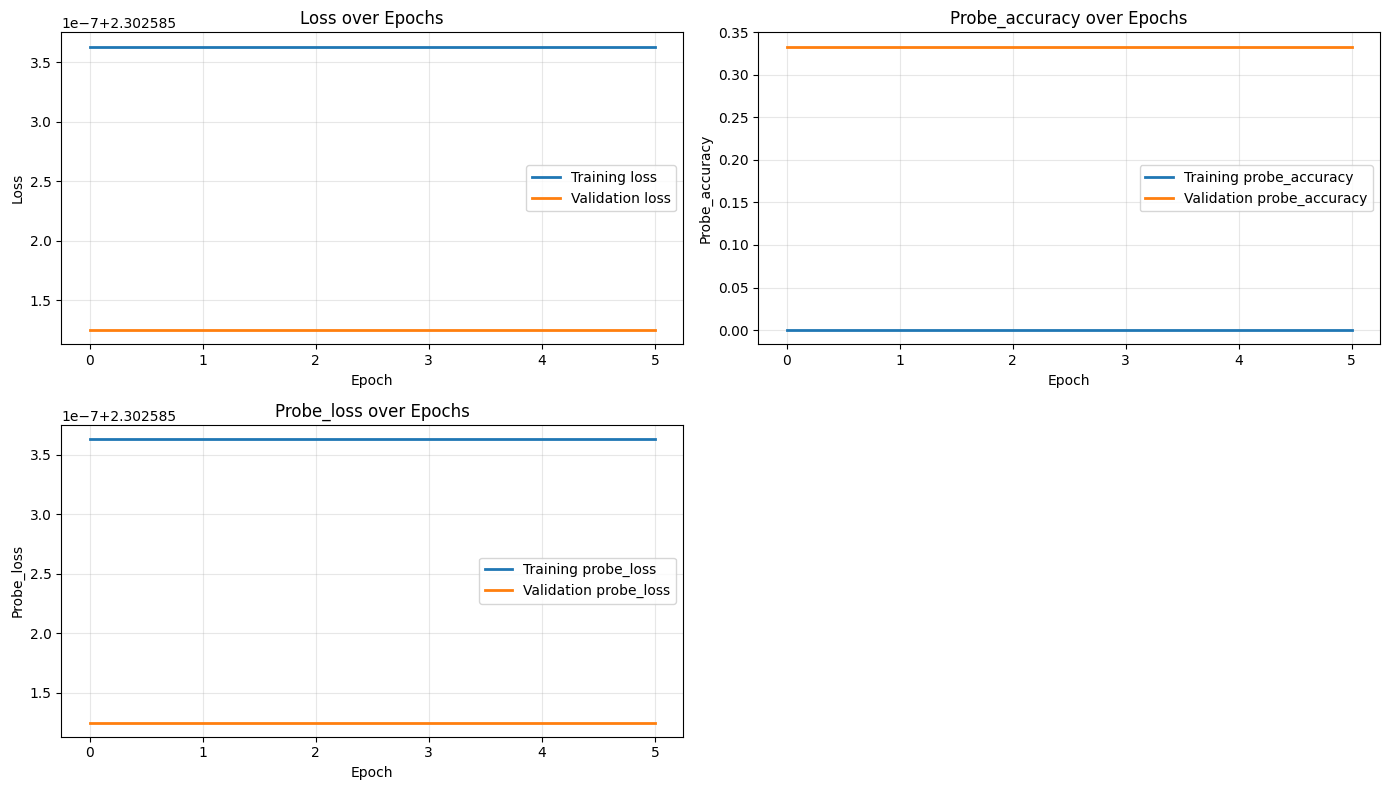


Available metrics in history:
  loss: min=2.3026, max=2.3026, final=2.3026
  probe_accuracy: min=0.0000, max=0.0000, final=0.0000
  probe_loss: min=2.3026, max=2.3026, final=2.3026
  val_loss: min=2.3026, max=2.3026, final=2.3026
  val_probe_accuracy: min=0.3333, max=0.3333, final=0.3333
  val_probe_loss: min=2.3026, max=2.3026, final=2.3026


In [8]:
# Get all unique metric names (without 'val_' prefix)
metrics = set()
for key in history.history.keys():
    metric_name = key.replace('val_', '')
    metrics.add(metric_name)

metrics = sorted(list(metrics))

# Create subplots for each metric
n_metrics = len(metrics)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
if n_metrics == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot each metric
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Training metric
    if metric in history.history:
        ax.plot(history.history[metric], label=f'Training {metric}', linewidth=2)
    
    # Validation metric
    val_metric = f'val_{metric}'
    if val_metric in history.history:
        ax.plot(history.history[val_metric], label=f'Validation {metric}', linewidth=2)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'{metric.capitalize()} over Epochs')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(metrics), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary of all metrics
print("\nAvailable metrics in history:")
for key in sorted(history.history.keys()):
    values = history.history[key]
    print(f"  {key}: min={min(values):.4f}, max={max(values):.4f}, final={values[-1]:.4f}")

In [9]:
# Evaluate on test set
print("\nEvaluating on test set...")
test_results = evaluate_model(sim, inp, p_out, X_test, y_test)

# Find the accuracy key (it will contain 'accuracy' in the name)
accuracy_key = [k for k in test_results.keys() if 'accuracy' in k][0]

print(f"Test Loss: {test_results['loss']:.4f}")
print(f"Test Accuracy: {test_results[accuracy_key]:.4f}")

sim.close()


Evaluating on test set...


|           Constructing graph: pre-build stage (0%)           | ETA:  --:--:--
|############Constructing graph: pre-build stage (57%)           | ETA: 0:00:00
|############Constructing graph: pre-build stage (57%)           | ETA: 0:00:00
|############Constructing graph: pre-build stage (71%)           | ETA: 0:00:00
|############Constructing graph: pre-build stage (71%)           | ETA: 0:00:00
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
Constructing graph: pre-build stage finished in 0:00:00
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|             Constructing graph: build stage (0%)             | ETA:  --:--:--
|####   